<a href="https://colab.research.google.com/github/AhmadAlabrash/Ro-Deep-Learning/blob/main/RO_DL_Dropout_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [324]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [325]:
df= pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df =df.drop('customerID',axis=1)

In [326]:
df.isnull().sum
df.Churn.unique

<bound method Series.unique of 0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object>

In [327]:
df1 = df[df.TotalCharges != ' ']
df1.describe

<bound method NDFrame.describe of       gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL     

In [328]:
#change  to numeric
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df1['Churn']=la.fit_transform(df1.Churn)
df1['tenure']=la.fit_transform(df1.tenure)
df1.TotalCharges= pd.to_numeric(df1.TotalCharges)
df1 =pd.get_dummies(df1,columns=['InternetService','Contract','PaymentMethod'])
df1.dtypes
df2 =df1.iloc[:,14:]
df2['tenure']=df1['tenure']
df1.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

gender                                      object
SeniorCitizen                                int64
Partner                                     object
Dependents                                  object
tenure                                       int64
PhoneService                                object
MultipleLines                               object
OnlineSecurity                              object
OnlineBackup                                object
DeviceProtection                            object
TechSupport                                 object
StreamingTV                                 object
StreamingMovies                             object
PaperlessBilling                            object
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [329]:
#scale your data
from sklearn.preprocessing import MinMaxScaler
sa=MinMaxScaler()
df2[['TotalCharges','MonthlyCharges','tenure']]=sa.fit_transform(df2[['TotalCharges','MonthlyCharges','tenure']])

df2

,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure
0,0.115423,0.001275,0,1,0,0,1,0,0,0,0,1,0,0.000000
1,0.385075,0.215867,0,1,0,0,0,1,0,0,0,0,1,0.464789
2,0.354229,0.010310,1,1,0,0,1,0,0,0,0,0,1,0.014085
3,0.239303,0.210241,0,1,0,0,0,1,0,1,0,0,0,0.619718
4,0.521891,0.015330,1,0,1,0,1,0,0,0,0,1,0,0.014085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.662189,0.227521,0,1,0,0,0,1,0,0,0,0,1,0.323944
7039,0.845274,0.847461,0,0,1,0,0,1,0,0,1,0,0,1.000000
7040,0.112935,0.037809,0,1,0,0,1,0,0,0,0,1,0,0.140845
7041,0.558706,0.033210,1,0,1,0,1,0,0,0,0,0,1,0.042254


In [330]:
x1 = df2.drop('Churn',axis=1)
y1 =df2['Churn']

from sklearn.model_selection import train_test_split
X,x,Y,y = train_test_split(x1,y1,train_size=0.8)
Y.shape

(5625,)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


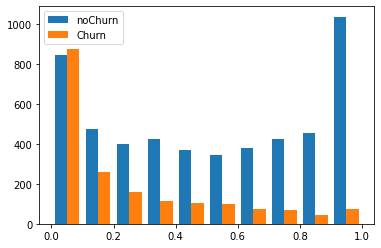

In [331]:
a = df2[df2.Churn == 0].tenure
b = df2[df2.Churn == 1].tenure

plt.hist([a,b],label=['noChurn','Churn'])
plt.legend()

In [332]:
model = keras.Sequential ([
    
    keras.layers.Dense(3000,activation ='relu' ),
    keras.layers.Dense(1000,activation ='relu' ),
    keras.layers.Dense(1,activation ='sigmoid' )
])
model.compile(
              optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']
)
model.fit(X,Y)

176/176 [==============================] - 8s 40ms/step - loss: 0.4452 - accuracy: 0.7835
